# Bézier Curve Pro

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryutarodayo1234/BezierCurvePro/blob/main/samples/Vln_demo/notebooks/2024_BezierCurvePro_0618.ipynb)


最終更新：2024.06.18


# **利用規約**

本ノートブック（以下、「本ツール」といいます）は、楽譜（MusicXMLから変換したフルコンテキストラベルファイル）からバイオリンの音を合成するAIのプロトタイプです。本ツールを使用することにより、以下の利用規約に同意したものとみなされます。

1. **責任の限定**
   - 本ツールはプロトタイプであり、提供される機能および生成される音声の品質について一切の保証を行いません。
   - 本ツールの利用により発生したいかなる損害についても、開発者は一切の責任を負いません。

2. **対応について**
   - ご質問や不具合報告については、可能な限り対応するよう努めますが、すべてにお答えできるものではないことをご了承ください。

3. **提案について**
   - 本ツールに関する機能要望やアイディアの提案は受け付けておりません。これらの送付はご遠慮ください。

4. **利用の条件**
   - 本ツールの利用は個人の責任において行われるものとし、法令に違反する目的での利用は禁止します。

5. **知的財産権**
   - 本ツールおよびその内容に関する知的財産権はすべて開発者または正当な権利者に帰属します。

6. **変更について**
   - 本利用規約は、予告なく変更されることがあります。変更後に本ツールを利用する場合、変更後の利用規約に同意したものとみなされます。

本ツールを使用する前に、本利用規約をよくお読みいただき、同意の上ご利用ください。

\

# **お問い合わせ**

開発者：松本龍太郎

*   ryutarodayo1234 ☆ icloud.com ☆→@
*   https://x.com/ryutarodayo1234


\

# **参考**

**pythonで学ぶ音声合成 機械学習実践シリーズ**
  - https://book.impress.co.jp/books/1120101073
  
**Melisma**
  - https://kagura-music.jp/melisma-top

**NEUTRINO**
  - https://studio-neutrino.com/




## 準備

### Google Colabを利用する場合

Google Colab上でこのノートブックを実行する場合は、メニューの「ランタイム -> ランタイムのタイムの変更」から、「ハードウェア アクセラレータ」を **GPU** に変更してください。

### Python version

In [ ]:
!python -VV

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


### ttslearn のインストール

In [ ]:
# システムライブラリのインストール
!apt-get update
!apt-get install -y build-essential libatlas-base-dev

# 必要なパッケージのインストール
!pip install wheel setuptools cython==0.29.24 numpy==1.21.0 scipy


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [927 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,917 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,092 kB]
Hit:13 http://

# **ここで再起動が必要です。**
画面の指示に従ってください。


In [ ]:
# nnmnkwiiのソースコードをクローン
!git clone https://github.com/r9y9/nnmnkwii.git
%cd nnmnkwii

# ビルドスキップしてインストール
!pip install --no-build-isolation --no-use-pep517 .

# インストールの確認
import nnmnkwii
print(nnmnkwii.__version__)


Cloning into 'nnmnkwii'...
remote: Enumerating objects: 10760, done.
remote: Counting objects: 100% (1003/1003), done.
remote: Compressing objects: 100% (340/340), done.
remote: Total 10760 (delta 636), reused 987 (delta 628), pack-reused 9757
Receiving objects: 100% (10760/10760), 81.53 MiB | 36.62 MiB/s, done.
Resolving deltas: 100% (8185/8185), done.
/content/nnmnkwii
Processing /content/nnmnkwii
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.3/421.3 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nnmnkwii: filename=nnmnkwii-0.1.2+def3375-cp310-cp310-linux_x86_64.whl size=3351956 sha256=4ccb464cbf1a7af5fd4139adfca764bf611267c108b28cddd7a26f40e94d896e
  Stored in directory: /tmp/pip-ephem-wheel-cache-_3v54ex8/wheels/6b/c9/89/c8aec9b607f60739f62b055fb9954bdb67d7be8022d7bf719e
  Creat

In [ ]:
!pip install ttslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 12.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

# **ここで再起動が必要です。**
画面の指示に従ってください。

In [ ]:
import ttslearn
ttslearn.__version__

'0.2.2'

## 10.1 本章の日本語音声合成システムの実装

### レシピ実行の前準備

In [ ]:
%%capture
from ttslearn.env import is_colab
from os.path import exists

# pip install ttslearn ではレシピはインストールされないので、手動でダウンロード
if is_colab() and not exists("recipes.zip"):
    !curl -LO https://github.com/r9y9/ttslearn/releases/download/v{ttslearn.__version__}/recipes.zip
    !unzip -o recipes.zip

In [ ]:
import os
# recipeのディレクトリに移動
cwd = os.getcwd()
os.chdir("/content/recipes/tacotron/")

In [ ]:
import time
start_time = time.time()

### パッケージのインポート

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/ryutarodayo1234/BezierCurvePro/main/ttslearn/dsp.py'
filename = 'dsp.py'

response = requests.get(url)
if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)

# ダウンロードしたモジュールをインポート
import dsp
from dsp import mulaw_quantize, logmelspectrogram


In [ ]:
import os
import shutil

# ダウンロードリンク
url = "https://raw.githubusercontent.com/ryutarodayo1234/BezierCurvePro/main/ttslearn/dsp.py"
destination = "/usr/local/lib/python3.10/dist-packages/ttslearn/dsp.py"
backup_destination = "/usr/local/lib/python3.10/dist-packages/ttslearn/dsp_backup.py"

# 既存のdsp.pyをバックアップ
if os.path.exists(destination):
    shutil.copy(destination, backup_destination)

# URLからファイルをダウンロードして置き換え
!wget -O {destination} {url}


--2024-06-18 04:55:59--  https://raw.githubusercontent.com/ryutarodayo1234/BezierCurvePro/main/ttslearn/dsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9698 (9.5K) [text/plain]
Saving to: ‘/usr/local/lib/python3.10/dist-packages/ttslearn/dsp.py’

/usr/local/lib/pyth 100%[===================>]   9.47K  --.-KB/s    in 0s      

2024-06-18 04:55:59 (65.3 MB/s) - ‘/usr/local/lib/python3.10/dist-packages/ttslearn/dsp.py’ saved [9698/9698]



In [ ]:
%pylab inline
%load_ext autoreload
%load_ext tensorboard
%autoreload
import IPython
from IPython.display import Audio
import tensorboard as tb
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# 数値演算
import numpy as np
import torch
from torch import nn
# 音声波形の読み込み
from scipy.io import wavfile
# フルコンテキストラベル、質問ファイルの読み込み
from nnmnkwii.io import hts
# 音声分析
import pyworld
# 音声分析、可視化
import librosa
import librosa.display
import pandas as pd
# Pythonで学ぶ音声合成
import ttslearn

In [ ]:
# シードの固定
#from ttslearn.util import init_seed
#init_seed(773)

In [ ]:
torch.__version__

'2.3.0+cu121'

### 描画周りの設定

In [ ]:
from ttslearn.notebook import get_cmap, init_plot_style, savefig
cmap = get_cmap()
init_plot_style()

### Tensorboard によるログの可視化

## 10.2 Tacotron 2 を日本語に適用するための変更

### 音素列と韻律記号付き音素列の比較

In [ ]:
import pyopenjtalk
# この実装は後述します
from ttslearn.tacotron.frontend.openjtalk import pp_symbols

In [ ]:
print("音素列:", pyopenjtalk.g2p("端が"))
print("音素列:", pyopenjtalk.g2p("箸が"))
print("音素列:", pyopenjtalk.g2p("橋が"))

Downloading: "https://github.com/r9y9/open_jtalk/releases/download/v1.11.1/open_jtalk_dic_utf_8-1.11.tar.gz"


dic.tar.gz: 0.00B [00:00, ?B/s]

Extracting tar file /usr/local/lib/python3.10/dist-packages/pyopenjtalk/dic.tar.gz
音素列: h a sh i g a
音素列: h a sh i g a
音素列: h a sh i g a


In [ ]:
print("韻律記号付き音素列:", " ".join(pp_symbols(pyopenjtalk.extract_fullcontext("端が"))))
print("韻律記号付き音素列:", " ".join(pp_symbols(pyopenjtalk.extract_fullcontext("箸が"))))
print("韻律記号付き音素列:", " ".join(pp_symbols(pyopenjtalk.extract_fullcontext("橋が"))))

韻律記号付き音素列: ^ h a [ sh i g a $
韻律記号付き音素列: ^ h a ] sh i g a $
韻律記号付き音素列: ^ h a [ sh i ] g a $


### フルコンテキストラベルからの音素列および韻律記号の抽出

In [ ]:
import re

def numeric_feature_by_regex(regex, s):
    match = re.search(regex, s)
    # 未定義 (xx) の場合、コンテキストの取りうる値以外の適当な値
    if match is None:
        return -50
    return int(match.group(1))

In [ ]:
labels = hts.load(ttslearn.util.example_label_file())
labels.contexts[1]

'xx^sil-m+i=z/A:-2+1+3/B:xx-xx_xx/C:02_xx+xx/D:13+xx_xx/E:xx_xx!xx_xx-xx/F:3_3#0_xx@1_5|1_23/G:7_2%0_xx_1/H:xx_xx/I:5-23@1+1&1-5|1+23/J:xx_xx/K:1+5-23'

In [ ]:
numeric_feature_by_regex(r"/A:([0-9\-]+)\+", labels.contexts[1])

-2

In [ ]:
def pp_symbols(labels, drop_unvoiced_vowels=True):
    PP = []
    N = len(labels)

    # 各音素毎に順番に処理
    for n in range(N):
        lab_curr = labels[n]

        # 当該音素
        p3 = re.search(r"\-(.*?)\+", lab_curr).group(1)

        # 無声化母音を通常の母音として扱う
        if drop_unvoiced_vowels and p3 in "AEIOU":
            p3 = p3.lower()

        # 先頭と末尾の sil のみ例外対応
        if p3 == "sil":
            assert n == 0 or n == N - 1
            if n == 0:
                PP.append("^")
            elif n == N - 1:
                # 疑問系かどうか
                e3 = numeric_feature_by_regex(r"!(\d+)_", lab_curr)
                if e3 == 0:
                    PP.append("$")
                elif e3 == 1:
                    PP.append("?")
            continue
        elif p3 == "pau":
            PP.append("_")
            continue
        else:
            PP.append(p3)

        # アクセント型および位置情報（前方または後方）
        a1 = numeric_feature_by_regex(r"/A:([0-9\-]+)\+", lab_curr)
        a2 = numeric_feature_by_regex(r"\+(\d+)\+", lab_curr)
        a3 = numeric_feature_by_regex(r"\+(\d+)/", lab_curr)
        # アクセント句におけるモーラ数
        f1 = numeric_feature_by_regex(r"/F:(\d+)_", lab_curr)

        a2_next = numeric_feature_by_regex(r"\+(\d+)\+", labels[n + 1])

        # アクセント句境界
        if a3 == 1 and a2_next == 1:
            PP.append("#")
        # ピッチの立ち下がり（アクセント核）
        elif a1 == 0 and a2_next == a2 + 1 and a2 != f1:
            PP.append("]")
        # ピッチの立ち上がり
        elif a2 == 1 and a2_next == 2:
            PP.append("[")

    return PP

In [ ]:
import pyopenjtalk

text = "今日の天気は？"

# テキストからフルコンテキストを抽出
labels = pyopenjtalk.extract_fullcontext(text)
# フルコンテキストから、韻律記号付き音素列に変換
PP = pp_symbols(labels)

print("入力文字列:", text)
print("音素列:", pyopenjtalk.g2p(text))
print("韻律記号付き音素列:", " ".join(PP))

入力文字列: 今日の天気は？
音素列: ky o o n o t e N k i w a
韻律記号付き音素列: ^ ky o ] o n o # t e ] N k i w a ?


### パッケージングしたモデルを利用したTTS

In [ ]:
import os
# recipeのディレクトリに移動
cwd = os.getcwd()
os.chdir("/content/")

In [ ]:
import os
import urllib.request
import zipfile

# ダウンロードするファイルのURL
url = "https://github.com/ryutarodayo1234/BezierCurvePro/raw/main/samples/Vln_demo/DEMO/2024_0613/jsut_sr16000_tacotron2_rf2_wavenet_sr16k_mulaw256_30layers%20.zip"
file_name = "jsut_sr16000_tacotron2_rf2_wavenet_sr16k_mulaw256_30layers.zip"
output_dir = "/content/"

# ファイルのダウンロード
urllib.request.urlretrieve(url, file_name)
print(f"Downloaded {file_name}")

# ZIPファイルの解凍
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(output_dir)
print(f"Extracted to {output_dir}")


Downloaded jsut_sr16000_tacotron2_rf2_wavenet_sr16k_mulaw256_30layers.zip
Extracted to /content/


/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Downloaded file22.lab


100%|██████████| 195200/195200 [30:20<00:00, 107.25it/s]


生成音


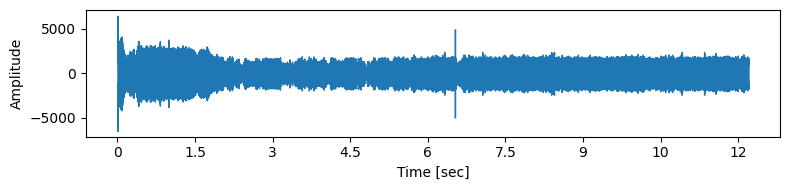

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from ttslearn.tacotron import Tacotron2TTS
from tqdm import tqdm
from IPython.display import Audio
import urllib.request

# パッケージングしたモデルのパスを指定します
model_url = "/content/"

# Tacotron2のTTSエンジンを初期化
engine = Tacotron2TTS(model_dir=model_url)

################1~24まで対応しています。################
filenum = 22

# URL of the file to download
url = f"https://raw.githubusercontent.com/ryutarodayo1234/BezierCurvePro/main/samples/Vln_demo/lab_files/file{filenum}.lab"
file_name = f"file{filenum}.lab"

# Download the file
urllib.request.urlretrieve(url, file_name)
print(f"Downloaded {file_name}")

# Assuming /content/ is the root directory in Google Colab
testMusic = f"/content/{file_name}"


wav, sr = engine.tts(testMusic, tqdm=tqdm)

Audio(wav, rate=sr)

fig, ax = plt.subplots(figsize=(8,2))

# WAVデータをfloat32にキャスト
wav = wav.astype(np.float32)

# 波形を表示
librosa.display.waveshow(wav, sr=sr, ax=ax)

ax.set_xlabel("Time [sec]")
ax.set_ylabel("Amplitude")
plt.tight_layout()

print("生成音")
Audio(wav, rate=sr)


In [ ]:
orgWav = f"https://raw.githubusercontent.com/ryutarodayo1234/BezierCurvePro/main/samples/Vln_demo/corpus_files/file{filenum}.wav"
print()
print()
print("オリジナル")
Audio(orgWav, rate=sr)


Output hidden; open in https://colab.research.google.com to view.